In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from itertools import combinations
from collections import Counter
from nltk.probability import FreqDist
from nltk.util import ngrams
import re
#from transformers import pipeline, set_seed
#from google.colab import files
#uploaded = files.upload()

#### Neural Networks

#### Exercise 1

#### Backpropagation

#### Exercise 2

#### Natural Language Processing

#### Exercise 3
#### 1. Exploring Word Embeddings

In [3]:
# Download pre - trained GloVe word vectors
glove_vectors = api.load("glove-wiki-gigaword-100")

words = ["computer", "laptop", "queen", "king"]
for word in words:
    most_sim = glove_vectors.most_similar(word,topn =5)
    print(f"The most similar words to '{word}' are")
    for i, word in enumerate(most_sim):
        print(f"{i+1}. {word[0]}: {word[1]}")
    print()


The most similar words to 'computer' are
1. computers: 0.875198245048523
2. software: 0.8373122215270996
3. technology: 0.7642159461975098
4. pc: 0.7366448640823364
5. hardware: 0.7290391325950623

The most similar words to 'laptop' are
1. laptops: 0.8518659472465515
2. computers: 0.7559927105903625
3. phones: 0.7229112386703491
4. portable: 0.7157841324806213
5. desktop: 0.7085692286491394

The most similar words to 'queen' are
1. princess: 0.7947244644165039
2. king: 0.7507690191268921
3. elizabeth: 0.7355712056159973
4. royal: 0.7065026164054871
5. lady: 0.7044796943664551

The most similar words to 'king' are
1. prince: 0.7682328820228577
2. queen: 0.7507689595222473
3. son: 0.7020888328552246
4. brother: 0.6985775828361511
5. monarch: 0.6977890729904175



#### Explanation:



In [4]:
# conduct vector arithmetics

result1 = glove_vectors.most_similar(positive=["king", "woman"], negative=["man"], topn=5)
result2 = glove_vectors.most_similar(positive=["vehicle", "laptop"], negative=["computer"], topn=5)

print("The most similar words to the result of the vector operation 'king' - 'man' + 'woman' are:")
print()
for i, word in enumerate(result1):
    print(f"{i+1}. {word[0]}: {word[1]}")
print("\n")
print("The most similar words to the result of the vector operation 'vehicle' - 'computer' + 'laptop' are:")
print()
for i, word in enumerate(result2):
    print(f"{i+1}. {word[0]}: {word[1]}")

The most similar words to the result of the vector operation 'king' - 'man' + 'woman' are:

1. queen: 0.7698541283607483
2. monarch: 0.6843380928039551
3. throne: 0.6755736470222473
4. daughter: 0.6594555974006653
5. princess: 0.6520534157752991


The most similar words to the result of the vector operation 'vehicle' - 'computer' + 'laptop' are:

1. suv: 0.7571245431900024
2. minivan: 0.7312466502189636
3. parked: 0.7256272435188293
4. car: 0.7248832583427429
5. jeep: 0.7094311118125916


#### Explanation:




#### 2. Investigating Societal Biases:

In [5]:
# comparing similarities
professions = ["engineer", "nurse", "scientist"]
names = ["james", "emily", "mohammed", "ling", "juan", "fatima"]

# get combinations of the two lists
combinations_professions = list(combinations(professions, 2))
combinations_names = list(combinations(names, 2))

for combination in combinations_professions:
    vector1 = glove_vectors[combination[0]].reshape(1,-1)
    vector2 = glove_vectors[combination[1]].reshape(1,-1)
    sim = cosine_similarity(vector1, vector2)[0]
    print(f"Similarity between '{combination[0]}' and '{combination[1]}': {sim[0]}")
print()
for combination in combinations_names:
    vector1 = glove_vectors[combination[0]].reshape(1,-1)
    vector2 = glove_vectors[combination[1]].reshape(1,-1)
    sim = cosine_similarity(vector1, vector2)[0]
    print(f"Similarity between '{combination[0]}' and '{combination[1]}': {sim[0]}")

Similarity between 'engineer' and 'nurse': 0.43718859553337097
Similarity between 'engineer' and 'scientist': 0.6081478595733643
Similarity between 'nurse' and 'scientist': 0.3445221483707428

Similarity between 'james' and 'emily': 0.520024836063385
Similarity between 'james' and 'mohammed': 0.18603792786598206
Similarity between 'james' and 'ling': 0.18465358018875122
Similarity between 'james' and 'juan': 0.3696228861808777
Similarity between 'james' and 'fatima': 0.00801914744079113
Similarity between 'emily' and 'mohammed': 0.10634013265371323
Similarity between 'emily' and 'ling': 0.14373600482940674
Similarity between 'emily' and 'juan': 0.18589052557945251
Similarity between 'emily' and 'fatima': 0.28988373279571533
Similarity between 'mohammed' and 'ling': 0.136818528175354
Similarity between 'mohammed' and 'juan': 0.1896083652973175
Similarity between 'mohammed' and 'fatima': 0.41418784856796265
Similarity between 'ling' and 'juan': 0.21996815502643585
Similarity between 'lin

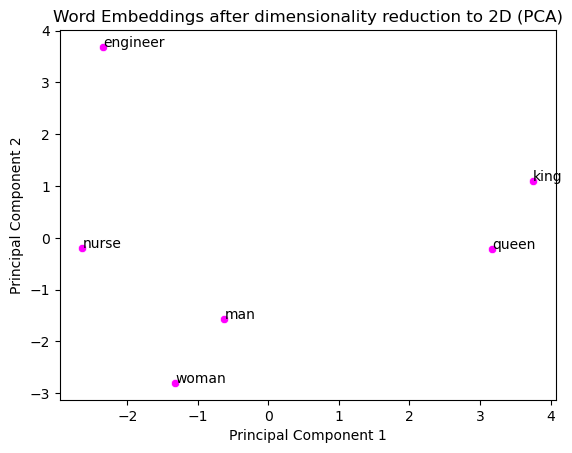

In [6]:
words = ["king", "queen", "man", "woman", "nurse", "engineer"]
word_vectors = [glove_vectors[word] for word in words]

# use PCA to reduce dimensions of word embeddings to 2D
pca = PCA(n_components=2)
vectors_reduced = pca.fit_transform(word_vectors)

# scatter plot
sns.scatterplot(x=vectors_reduced[:, 0], y=vectors_reduced[:, 1], color="magenta")

for i, word in enumerate(words):
    plt.annotate(word, (vectors_reduced[i, 0], vectors_reduced[i, 1]))

plt.title('Word Embeddings after dimensionality reduction to 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Discussion:

#### Exercise 4

In [7]:
# read in data
with open("text_corpus.txt", "r") as file:
    text = file.read()

# We split each word and punctuation into a separate token

tokenized_text = re.findall(r"[\w']+|[. ,!?;]" ,text.lower())

# We remove punctuation etc.
words = [word for word in tokenized_text if word.isalpha()] #DOES NOT KEEP THE ORDER
sentence_prefixes = ["It is not for me to" , "Sherlock Holmes is" , "The mystery of"]

In [24]:
# predict next word for a prefix based on the last word in the prefix given corpus frequency (word counts) 

def predict_next_word(ngram_model, tokenized_text, prefix, max_length=20):
    last_word = prefix.split()[-1]
    continuation = " "
    for i in range(max_length):
        next_word = ngram_model(tokenized_text,prefix+continuation)
        continuation += " " + next_word
        last_word = next_word
        
    print(prefix + "\033[1m" + continuation + "\033[0m")


# WAR WAHRSCHEINLICH ANDERS GEMEINT... next 20 words, wie eine Kette immer vom Ende weiter
# ALSO: N Gram as naive bayes?

In [25]:
# unigram model 

def unigram_model(tokenized_text,prefix): # predicts most frequent token
    unigram_fr = FreqDist(tokenized_text) # get frequencies of tokens
    most_frequent_unigram = unigram_fr.max() # get most frequent unigram
    return most_frequent_unigram

# bigram model
def bigram_model(tokenized_text, prefix):
    '''
    Bigram model that predicts the next word based on the previous one
    '''
    bigrams = list(ngrams(tokenized_text, 2)) # generate bigrams
    last_word = prefix.split()[-1] # get last word
    last_word_bigrams = [bigram for bigram in bigrams if bigram[0] == last_word] # filter out bigrams that do not have the last word of the prefix as first part
    if not last_word_bigrams:  # check if the filtered trigram list is empty
        print("No relevant bigrams found. Returning unigram model prediction.")
        return unigram_model(tokenized_text,prefix) # return prediction made by bigram model if there are no filtered trigrams
    bigram_fr = FreqDist(last_word_bigrams) # create frequency distribution over filtered bigrams
    most_frequent_bigram = bigram_fr.max() # get most frequent filtered bigram
    return most_frequent_bigram[1] # return predicted next word based on the last word of the prefix
    
# trigram model

def trigram_model(tokenized_text, prefix):
    trigrams = list(ngrams(tokenized_text, 3)) # generate trigrams
    last_two_words = prefix.split()[-2:] # get last two words
    last_word_trigrams = [trigram for trigram in trigrams if trigram[0] == last_two_words[0] and trigram[1] == last_two_words[1]] # filter out trigrams that do not have the last two words of the prefix as first part
    if not last_word_trigrams:  # check if the filtered trigram list is empty
        print("No relevant trigrams found. Returning bigram model prediction.")
        return bigram_model(tokenized_text,prefix) # return prediction made by bigram model if there are no filtered trigrams
    trigram_fr = FreqDist(last_word_trigrams) # create frequency distribution over filtered trigrams
    most_frequent_trigram = trigram_fr.max() # get most frequent filtered trigram
    return most_frequent_trigram[2] # return predicted next word based on the last two words of the prefix

models = [unigram_model, bigram_model, trigram_model]

for prefix in sentence_prefixes:
    for model in models:
        predict_next_word(model, words, prefix)
    print("--------------------")

It is not for me to  the the the the the the the the the the the the the the the the the the the the
It is not for me to  the door and i have been a little more than i have been a little more than i have been
It is not for me to  be a man who is in a few minutes with his head sunk upon his face was bent downward his
--------------------
Sherlock Holmes is  the the the the the the the the the the the the the the the the the the the the
Sherlock Holmes is  a little more than i have been a little more than i have been a little more than i have
No relevant trigrams found. Returning bigram model prediction.
Sherlock Holmes is  a very serious one to the other side of the house and there was a very serious one to the
--------------------
The mystery of  the the the the the the the the the the the the the the the the the the the the
The mystery of  the door and i have been a little more than i have been a little more than i have been
The mystery of  the house and there was a very serious one t

In [19]:
# use a pre-trained language model (gpt-2), to predict the continuation of sentence prefixes
generator = pipeline('text-generation', model='gpt2')
set_seed(42)

# TODO: predict the sentence given the sentence prefixes
for prefix in sentence_prefixes:
  results = generator(prefix, max_length=20, num_return_sequences=3, pad_token_id=generator.tokenizer.eos_token_id, truncation=True)
  for i,result in enumerate(results):
      print(f"{i+1}. {result['generated_text']}")
      print()

  print("----------------------")
  print()

1. It is not for me to speculate what that means. But whatever the final conclusion, I believe it

2. It is not for me to deny the fact that you and I live in real peace with our circumstances

3. It is not for me to ask you what the other part is for you, or how to approach

----------------------

1. Sherlock Holmes is being prosecuted in the United States on the "serious and aggravated computer fraud" charge

2. Sherlock Holmes is a man of few words.

He's been in over 600 police shootings

3. Sherlock Holmes is a regular on TNT's All In and features on a diverse roster of TV shows

----------------------

1. The mystery of this book?

The books are not necessarily a collection of the same titles and

2. The mystery of the existence of extraterrestrial species is not unknown. The most well known example is the

3. The mystery of the man's disappearance was first reported in the New York Times on November 12, and

----------------------



#### Discussion
- limitation of trigrams or generally n grams: the higher n the higher possibility that the n gram is not found in the corpus --> deal with missing trigrams, could return n-1-gram prediction.
- coherence --> not sure what is meant by that, trigram outperforms bigram and unigram for first prefix. Same result for third one and on second one, no relevant trigram found. UNKNOWN WORDS
- relevance -->
- creativity --> language model outperforms n-grams and the frequency based approach (predicting next word based on the last word in the prefix, essentially bigram approach).

first two approaches: only one word, language model predicts more words.

#### Computer Vision

#### Exercise 5

See additional .ipynb file.

#### References